# Tutorial 3 - Classification_Advanced (Train)

## Open Dataset : MURA Dataset (Ver 1.0)

- MUsculoskeletal RAdiographs (Bone X-rays)         
- https://stanfordmlgroup.github.io/competitions/mura/
- https://arxiv.org/abs/1712.06957

In [1]:
# Python 3.6
from __future__ import absolute_import, division, print_function
import os
import numpy as np
import matplotlib.pyplot as plt


# import tensorflow as tf
import keras
from keras.layers import Input

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model

from utils.custom_model import VGG16_residual_inception 


/Users/dhlee/anaconda/envs/tensorflow3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Parameter Setting

In [2]:
########################################################################
########################################################################
num_classes = 7 ## 14
input_size = 224
channel = 3
########################################################################
########################################################################

## Model Design

### Task 1 : VGG Network

[]

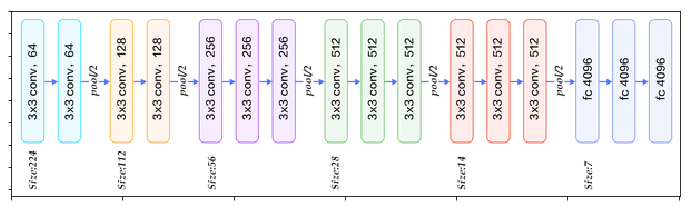

In [17]:
plot = plt.imread('./assets/vgg.png')
plt.figure(figsize=(12,6))
plt.imshow(plot)

frame = plt.gca()
frame.axes.xaxis.set_ticklabels([])
frame.axes.yaxis.set_ticklabels([])

- Convolution : 3x3
- Activation : ReLU
- Maxpooling Size / Stride : 2x2

e.g
- output = keras.layers.Conv2D(64, (3,3), activation = 'relu', padding ='same', name = 'abc_conv')(input)
- output = keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='abc_pool')(input)
- output = keras.layers.Flatten(name='flatten')(input)
- output = keras.layers.Dense(4096, activation='relu', name='abc_fc')(input)
- output = keras.layers.Dense(classes, activation='softmax', name='abc_predictions')(input)

### Task 2 : Residual Block

- weighte layer = Conv2D -> BatchNorm 
- output = keras.layers.add([previous_output, input])

[]

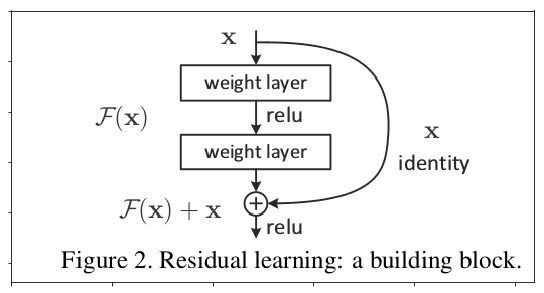

In [19]:
plot = plt.imread('./assets/skip_connection.png')
plt.figure(figsize=(10,5))
plt.imshow(plot)

frame = plt.gca()
frame.axes.xaxis.set_ticklabels([])
frame.axes.yaxis.set_ticklabels([])


### Task 3 : Inception Module

[]

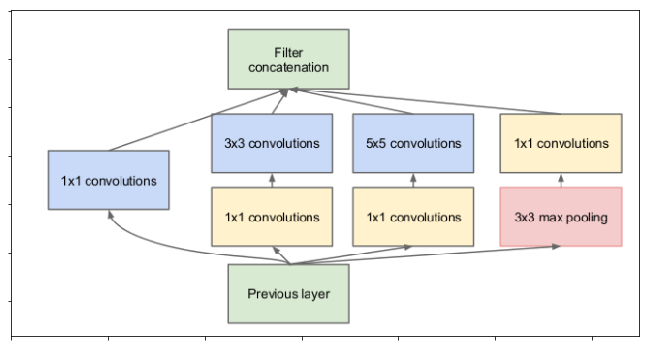

In [13]:
plot = plt.imread('./assets/inception.png')
plt.figure(figsize=(12,6))
plt.imshow(plot)

frame = plt.gca()
frame.axes.xaxis.set_ticklabels([])
frame.axes.yaxis.set_ticklabels([])


- output = keras.layers.concatenate([branch1x1a, branch3x3b, branch5x5c, branch1x1d], axis=channel,name='abc_mix')

### Task 4 : VGG16 + Residual Block (VGG block 3~4 사이) + Inception Module (VGG block 2~3 사이) 

In [3]:
########################################################################################################
########################################################################################################
input_tensor = Input(shape=(input_size, input_size, channel))


""" Custom Network """
model = VGG16_residual_inception(include_top = True, input_tensor=input_tensor, pooling= None, classes=num_classes)



model.compile(loss='categorical_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=0.001, decay=1e-6),
              metrics=['accuracy']
              )

########################################################################################################
########################################################################################################


### Display Network 

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot, plot_model

model.summary()
# SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_con